In [54]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D , Dense , AveragePooling2D , Flatten , MaxPooling2D
from tensorflow.keras import Sequential
from sklearn.preprocessing import OneHotEncoder

In [55]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [56]:
(X_train , Y_train ) , (X_test , Y_test ) = tf.keras.datasets.fashion_mnist.load_data()

In [57]:
(X_train , Y_train) , (X_val ,Y_val) = (X_train[:5000] , Y_train[:5000] ) , (X_train[5000:],Y_train[5000:])

- Note that OneHotEncoder from Sklearn and oneHotencoder for tf.keras are different in the form that
    - SKlearn just gives the location in array with the weightage
    - TF.keras gives the whole array back 

In [58]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(5000, 28, 28)
(10000, 28, 28)
(55000, 28, 28)


In [59]:
w,h = 28,28
X_train = X_train.reshape(len(X_train) ,  w, h , 1)
X_test = X_test.reshape(len(X_test), w, h , 1)
X_val = X_val.reshape( len(X_val) , w, h , 1)

Y_train = tf.keras.utils.to_categorical(Y_train , 10)
Y_test = tf.keras.utils.to_categorical(Y_test , 10)
Y_val = tf.keras.utils.to_categorical(Y_val , 10)

In [60]:
def build_lenet_model1():
    model = Sequential()
    
    model.add(Conv2D(filters=6 , kernel_size=5 , padding="same", activation='sigmoid', input_shape=(28,28,1)))
    model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='same'))

    model.add(Conv2D(filters=16 , kernel_size=5 , activation='sigmoid'))
    model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='same'))

    model.add(Flatten())

    model.add(Dense(120 , activation='sigmoid'))
    model.add(Dense(84,activation='sigmoid'))
    model.add(Dense(10,activation='softmax'))

    model.compile(loss='categorical_crossentropy' , 
                    optimizer='adam',
                    metrics=['accuracy'])
    return model

In [61]:
def build_lenet_model2():
    model = Sequential()
    
    model.add(Conv2D(filters=64 , kernel_size=5 , padding="same", activation='sigmoid', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

    model.add(Conv2D(filters=32 , kernel_size=5 , activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

    model.add(Flatten())

    model.add(Dense(120 , activation='sigmoid'))
    model.add(Dense(84,activation='sigmoid'))
    model.add(Dense(10,activation='softmax'))

    model.compile(loss='categorical_crossentropy' , 
                    optimizer='adam',
                    metrics=['accuracy'])
    return model

In [62]:
model = build_lenet_model1()
model2 = build_lenet_model2()

In [63]:
model.summary(0)
model2.summary(0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 dense_15 (Dense)            (None, 120)              

Epoch 1/10
79/79 [==============================] - 4s 40ms/step - loss: 2.1827 - accuracy: 0.1988 - val_loss: 1.7389 - val_accuracy: 0.4139
Epoch 2/10
79/79 [==============================] - 3s 40ms/step - loss: 1.3721 - accuracy: 0.5462 - val_loss: 1.1571 - val_accuracy: 0.5828
Epoch 3/10
79/79 [==============================] - 3s 38ms/step - loss: 1.0380 - accuracy: 0.6294 - val_loss: 0.9485 - val_accuracy: 0.6650
Epoch 4/10
79/79 [==============================] - 3s 38ms/step - loss: 0.8730 - accuracy: 0.6918 - val_loss: 0.8414 - val_accuracy: 0.6958
Epoch 5/10
79/79 [==============================] - 3s 39ms/step - loss: 0.7657 - accuracy: 0.7336 - val_loss: 0.7410 - val_accuracy: 0.7367
Epoch 6/10
79/79 [==============================] - 3s 39ms/step - loss: 0.6988 - accuracy: 0.7430 - val_loss: 0.7509 - val_accuracy: 0.7184
Epoch 7/10
79/79 [==============================] - 3s 39ms/step - loss: 0.6615 - accuracy: 0.7544 - val_loss: 0.6728 - val_accuracy: 0.7477
Epoch 8/10
79

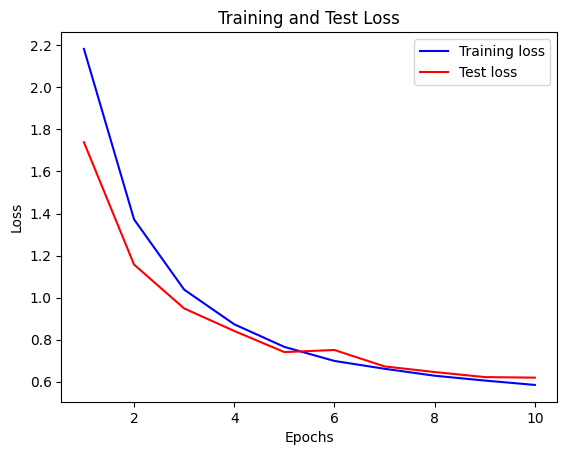

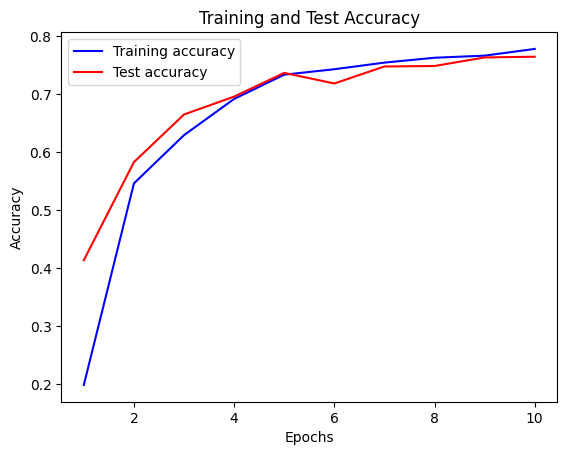

Epoch 1/10
79/79 [==============================] - 9s 103ms/step - loss: 1.8729 - accuracy: 0.3986 - val_loss: 1.2741 - val_accuracy: 0.6473
Epoch 2/10
79/79 [==============================] - 9s 110ms/step - loss: 1.0104 - accuracy: 0.6890 - val_loss: 0.8531 - val_accuracy: 0.7057
Epoch 3/10
79/79 [==============================] - 8s 103ms/step - loss: 0.7455 - accuracy: 0.7474 - val_loss: 0.7024 - val_accuracy: 0.7490
Epoch 4/10
79/79 [==============================] - 8s 102ms/step - loss: 0.6270 - accuracy: 0.7776 - val_loss: 0.6560 - val_accuracy: 0.7516
Epoch 5/10
79/79 [==============================] - 8s 101ms/step - loss: 0.5643 - accuracy: 0.7916 - val_loss: 0.5705 - val_accuracy: 0.7785
Epoch 6/10
79/79 [==============================] - 8s 102ms/step - loss: 0.5106 - accuracy: 0.8096 - val_loss: 0.5395 - val_accuracy: 0.8037
Epoch 7/10
79/79 [==============================] - 8s 102ms/step - loss: 0.4645 - accuracy: 0.8322 - val_loss: 0.4967 - val_accuracy: 0.8122
Epoch 

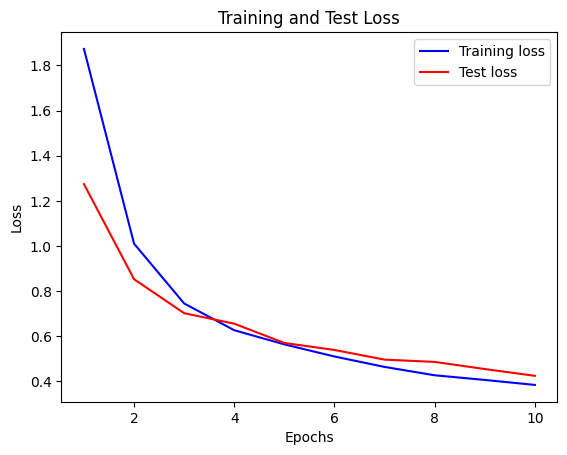

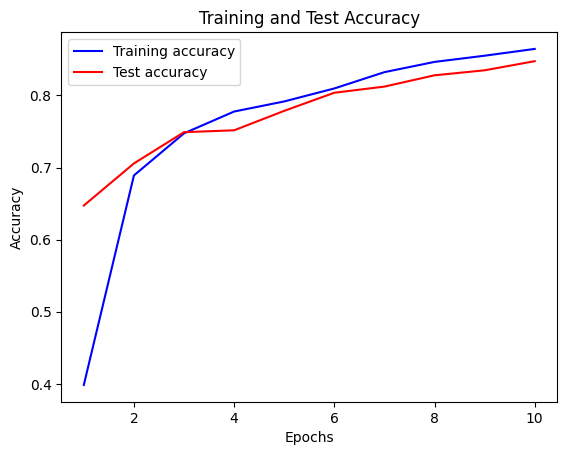

In [64]:
for i in range(0,2):
    if i == 1:
        model = model2 
    hist = model.fit(X_train , Y_train , batch_size = 64 , epochs = 10 , validation_data = [X_val , Y_val]) 
    plot_loss(hist)
    plot_accuracy(hist)

In [65]:
def plot_loss(history):
    # Extract the training loss from the history object
    training_loss = history.history['loss']

    # Extract the test (validation) loss from the history object
    test_loss = history.history['val_loss']

    # Create a range of epochs
    epochs = range(1, len(training_loss) + 1)

    # Plot training and test loss
    plt.figure()
    plt.plot(epochs, training_loss, 'b', label='Training loss')
    plt.plot(epochs, test_loss, 'r', label='Test loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [66]:
def plot_accuracy(history):
    # Extract the training accuracy from the history object
    training_accuracy = history.history['accuracy']

    # Extract the test (validation) accuracy from the history object
    test_accuracy = history.history['val_accuracy']

    # Create a range of epochs
    epochs = range(1, len(training_accuracy) + 1)

    # Plot training and test accuracy
    plt.figure()
    plt.plot(epochs, training_accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, test_accuracy, 'r', label='Test accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
